In [676]:
import numpy as np
import pandas as pd

In [677]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [678]:
import string

In [679]:
import pycountry

In [680]:
supply = pd.read_excel('supply_dataset.xlsx')

In [681]:
sup = supply.T
sup.drop(['Placement','GLOBAL ID','Code GCR','Series','Series unindented','Dataset'], inplace=True)

In [682]:
sup.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
Edition,2017-2018,2017-2018,2017-2018,2017-2018,2017-2018,2017-2018,2016-2017,2016-2017,2016-2017,2016-2017,...,2011-2012,2011-2012,2010-2011,2010-2011,2009-2010,2009-2010,2008-2009,2008-2009,2007-2008,2007-2008
Attribute,Value,Period,Rank,Source,Source date,Note,Value,Period,Rank,Source,...,Value,Rank,Value,Rank,Value,Rank,Value,Rank,Value,Rank
Albania,4.60736,Weighted average 2016-2017,81,World Economic Forum; Executive Opinion Survey...,27/09/2017,"Refer to the ""Technical Notes and Sources"" of ...",4.45015,2015-2016 weighted avg,82,World Economic Forum; Executive Opinion Survey...,...,4.98444,63,3.99643,90,2.71199,116,1.80472,128,1.65302,128
Algeria,4.19741,Weighted average 2016-2017,93,World Economic Forum; Executive Opinion Survey...,27/09/2017,"Refer to the ""Technical Notes and Sources"" of ...",4.03566,2015-2016 weighted avg,92,World Economic Forum; Executive Opinion Survey...,...,4.59393,75,4.76944,69,4.39401,76,4.53281,74,4.50669,68
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4185,140,1.53209,135,NaN,NaN,NaN,NaN,NaN,NaN


In [683]:
def value_cols(sup,cols):
    valuecols = []
    for col in cols:
        if sup[col].loc['Attribute'] == 'Value':
            valuecols.append(col)
    return valuecols

In [684]:
values_raw = sup[value_cols(sup, sup.columns)]
values_raw.columns = values_raw.loc['Edition']
values_raw.drop(['Edition','Attribute'], axis = 0, inplace = True)
values_raw = values_raw[:-8]
values_raw.head()

C:\ProgramData\Anaconda3\envs\reports_stuff\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Edition,2017-2018,2016-2017,2015-2016,2014-2015,2013-2014,2012-2013,2011-2012,2010-2011,2009-2010,2008-2009,2007-2008
Albania,4.60736,4.45015,4.72439,4.67217,4.45281,4.83051,4.98444,3.99643,2.71199,1.80472,1.65302
Algeria,4.19741,4.03566,4.02131,3.99995,4.18653,4.47241,4.59393,4.76944,4.39401,4.53281,4.50669
Angola,NaN,NaN,NaN,1.7145,1.65625,NaN,1.4185,1.53209,NaN,NaN,NaN
Argentina,3.00721,2.70286,2.56035,2.62633,3.05773,3.48083,3.75778,3.83035,3.48215,3.25399,3.6581
Armenia,4.78018,4.78378,4.76874,5.07773,5.20775,4.90274,4.76575,4.44769,4.22271,3.97428,3.86922


In [685]:
values_raw.tail(10)

Edition,2017-2018,2016-2017,2015-2016,2014-2015,2013-2014,2012-2013,2011-2012,2010-2011,2009-2010,2008-2009,2007-2008
Ukraine,4.48535,4.35103,4.62285,4.91109,4.72411,4.57706,4.32406,4.55108,4.47797,4.36928,3.90502
United Arab Emirates,6.51996,6.69566,6.60229,6.60229,6.45719,6.39401,6.41039,6.50867,6.43837,6.40973,6.4877
United Kingdom,6.65906,6.66605,6.60671,6.56756,6.65446,6.69316,6.71706,6.61532,6.42928,6.37429,6.53273
United States,6.24076,6.47314,6.44442,6.28627,6.19164,6.01915,6.04079,6.1797,6.432,6.46938,6.33169
Uruguay,6.02886,5.90202,5.81323,5.742,5.62038,5.86062,5.97275,5.81555,5.73756,5.44907,5.28879
Venezuela,2.1009,1.80362,1.9268,1.74143,1.78094,1.99844,1.93447,2.34649,3.2343,3.39424,3.84909
Viet Nam,4.33895,4.36692,4.11294,4.1895,3.96157,3.14394,3.28037,3.63898,3.32292,3.22028,3.45646
Yemen,1.18931,1.21504,NaN,1.45023,1.45415,1.40316,1.53773,NaN,NaN,NaN,NaN
Zambia,2.52094,2.50659,3.34628,3.32636,3.10312,3.5188,3.48261,3.26713,3.04763,2.92867,4.37236
Zimbabwe,3.08986,2.31088,1.92457,2.11756,1.97273,1.69385,1.6551,1.80713,1.9849,1.80092,2.07222


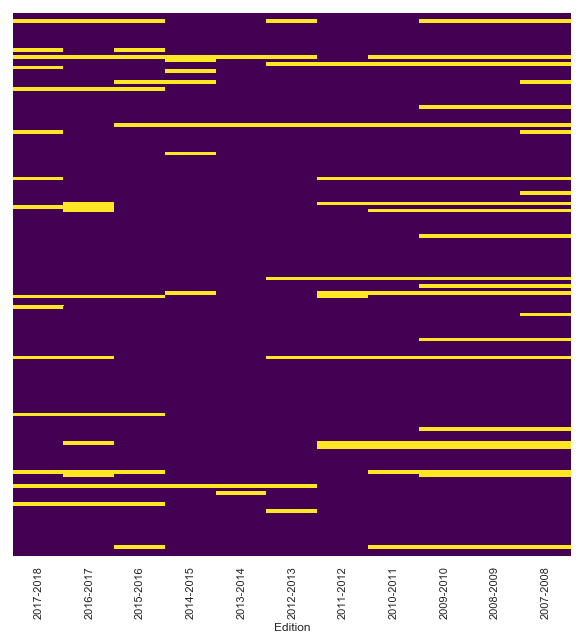

In [686]:
plt.figure(figsize=(10,10))
sns.heatmap(values_raw.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [687]:
ranking2018 = values_raw['2017-2018'].dropna().sort_values()
ranking2018

Yemen                     1.18931
Nigeria                   1.42239
Haiti                     1.43137
Lebanon                   1.65234
Malawi                    1.85023
Madagascar                1.91792
Benin                     2.06101
Congo, Democratic Rep.    2.06129
Mauritania                 2.0934
Venezuela                  2.1009
Cameroon                  2.21677
Chad                      2.24856
Dominican Republic         2.3353
Liberia                   2.39591
Burundi                   2.40228
Guinea                    2.41538
Zambia                    2.52094
Sierra Leone              2.57563
Paraguay                  2.61136
Nepal                     2.83433
Lesotho                   2.89877
Mali                      2.93291
Pakistan                  2.94996
Mozambique                2.97187
Argentina                 3.00721
Zimbabwe                  3.08986
Ghana                     3.11746
Tanzania                  3.14001
Ethiopia                  3.17323
Uganda        

In [688]:
def dot_float_series(series):
    return pd.Series([float(element.replace('.','').replace(',','.'))if 
                      (type(element)== str and element[0] not in string.ascii_letters) else element for element in series])

In [689]:
saidi_excluding = pd.read_csv('saidi_excluding_ex_tabula.csv')
saidi_excluding = saidi_excluding.apply(dot_float_series, axis = 0)
saidi_excluding = saidi_excluding.set_index('Country')

In [690]:
saidi_including = pd.read_csv('saidi_including_ex_tabula.csv')
saidi_including = saidi_including.apply(dot_float_series, axis = 0)
saidi_including = saidi_including.set_index('Country')

In [691]:
saidi_including.shape

(28, 15)

In [692]:
saidi_excluding.shape

(21, 15)

In [693]:
both_saidi = saidi_excluding.join(saidi_including,lsuffix='l',rsuffix='r')

In [694]:
both_saidi[['2012l','2012r']]

,2012l,2012r
Country,,
Austria,48.67,50.41
Croatia,NaN,664.00
Czech Republic,257.36,272.65
Denmark,19.44,19.49
France,75.70,78.50
Germany,27.74,29.20
Great Britain,62.14,74.75
Greece,250.00,299.00
Hungary,NaN,NaN


We will just look at saidi including exceptional events

In [695]:
ranking2016 = values_raw['2015-2016'].dropna().sort_values()

In [696]:
saidi2016 = saidi_including['2016']

In [697]:
ranking2015 = values_raw['2014-2015'].dropna().sort_values()
saidi2015 = saidi_including['2015']

In [698]:
df_compare16 = pd.concat([ranking2016, saidi2016], axis=1)
df_compare16.columns = ['poll','saidi']

C:\ProgramData\Anaconda3\envs\reports_stuff\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [699]:
df_compare16 = df_compare16.dropna()

In [700]:
df_compare15 = pd.concat([ranking2015, saidi2015], axis=1)
df_compare15.columns = ['poll','saidi']
df_compare15 = df_compare15.dropna()

C:\ProgramData\Anaconda3\envs\reports_stuff\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [701]:
df_compare16['scandinavia'] = np.zeros(df_compare16.shape[0])
for ind in df_compare16.index:
    if ind in ['Finland','Iceland','Norway','Denmark','Sweden']:
        df_compare16.loc[ind,'scandinavia'] = 1

In [702]:
df_compare15['scandinavia'] = np.zeros(df_compare15.shape[0])
for ind in df_compare15.index:
    if ind in ['Finland','Iceland','Norway','Denmark','Sweden']:
        df_compare15.loc[ind,'scandinavia'] = 1

In [703]:
df_compare16

,poll,saidi,scandinavia
Austria,6.5798,54.86,0.0
Bulgaria,4.34192,291.30,0.0
Croatia,5.60578,412.24,0.0
Czech Republic,6.39604,258.29,0.0
Denmark,6.69314,19.38,1.0
Estonia,5.56043,222.23,0.0
Finland,6.6875,80.56,1.0
France,6.51279,70.50,0.0
Germany,6.3873,23.55,0.0
Greece,5.18769,244.00,0.0


In [704]:
sns.set_style('whitegrid')

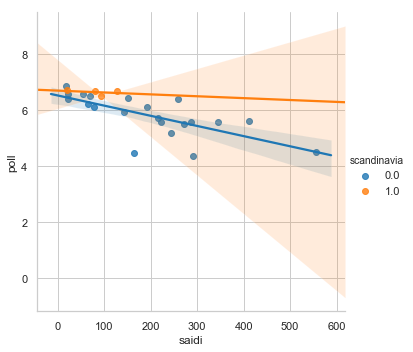

In [705]:
sns.lmplot(x = 'saidi', y = 'poll', data = df_compare16, hue = 'scandinavia')

In [706]:
from sklearn.linear_model import LinearRegression

In [707]:
x16 = df_compare16[['saidi']]
y16 = df_compare16['poll']

In [708]:
x15 = df_compare15[['saidi']]
y15 = df_compare15['poll']

In [709]:
lm16 = LinearRegression()

In [710]:
lm15 = LinearRegression()
lm15.fit(x15,y15)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [711]:
lm16.fit(x16,y16)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [712]:
lm16.coef_, lm16.intercept_
xline16 = np.linspace(0,600)

In [713]:
yline16 = lm16.intercept_ + lm16.coef_*xline16

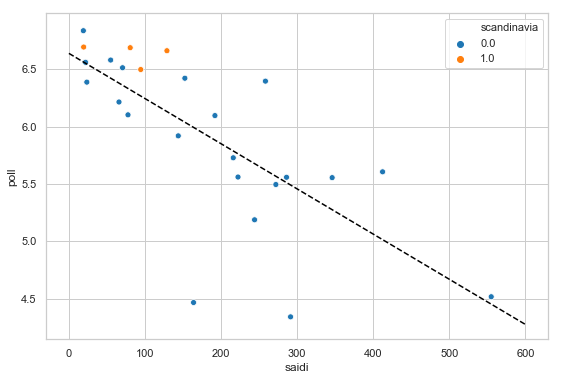

In [714]:
plt.figure(figsize=(9,6))
plt.plot(xline16, yline16, 'k--')
sns.scatterplot(y = 'poll',x = 'saidi', data = df_compare16, hue = 'scandinavia')

In [715]:
ypred16 = lm16.predict(df_compare16[['saidi']])

In [716]:
ypred15 = lm15.predict(df_compare15[['saidi']])

In [717]:
sns.set_context('poster')

In [718]:
plt.figure(figsize = (12,6))


<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [719]:
alpha2s = [pycountry.countries.get(name = country).alpha_2 if country != 'Czech Republic' else pycountry.countries.get(name = 'Czechia').alpha_2 for country in df_compare16.index[:]]

In [720]:
import copy

In [721]:
df_compare16_old_index = copy.deepcopy(df_compare16)

In [722]:
df_compare15_old_index = copy.deepcopy(df_compare15)

In [723]:
df_compare16.index = alpha2s

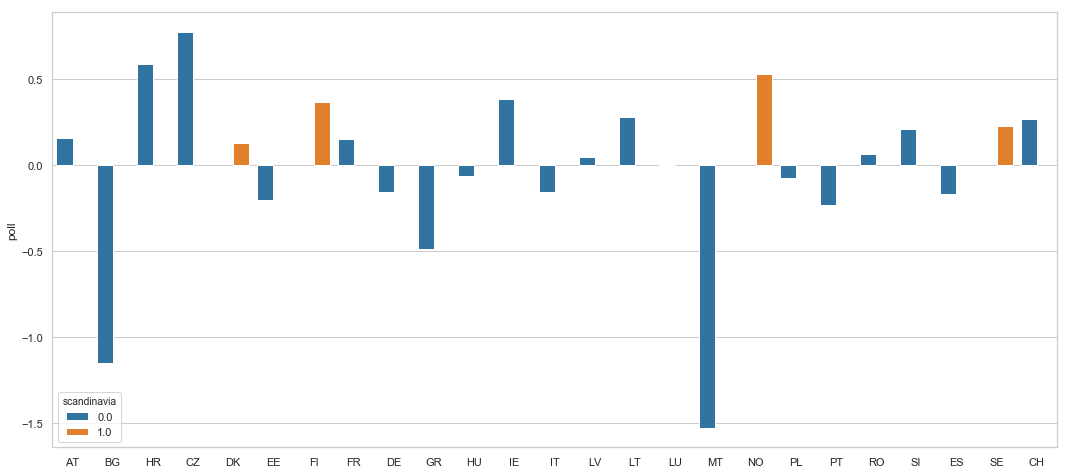

In [724]:
sns.set_context('notebook')
plt.figure(figsize = (18,8))
sns.barplot(x = df_compare16.index, y = df_compare16['poll'] - ypred16, hue = df_compare16['scandinavia'])

In [725]:
whr2015 = pd.read_csv('whr2015.csv')
whr2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [726]:
whr2016 = pd.read_csv('whr2016.csv')
whr2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [727]:
whr = whr2015[['Country','Happiness Score', 'Dystopia Residual']].merge(right = whr2016[['Country','Happiness Score', 'Dystopia Residual']], on= 'Country')
whr.set_index('Country', inplace=True)
whr.columns = ['Score 2015','Dyst Res 2015', 'Score 2016','Dyst Res 2016']

In [728]:
whr.head(20)

,Score 2015,Dyst Res 2015,Score 2016,Dyst Res 2016
Country,,,,
Switzerland,7.587,2.51738,7.509,2.69463
Iceland,7.561,2.70201,7.501,2.83137
Denmark,7.527,2.49204,7.526,2.73939
Norway,7.522,2.46531,7.498,2.66465
Canada,7.427,2.45176,7.404,2.70485
Finland,7.406,2.61955,7.413,2.82596
Netherlands,7.378,2.46570,7.339,2.70749
Sweden,7.364,2.37119,7.291,2.54734
New Zealand,7.286,2.26425,7.334,2.47553


In [729]:
whr['positivity 2015'] = whr['Dyst Res 2015'] - whr['Dyst Res 2015'].mean()

In [730]:
whr['positivity 2016'] = whr['Dyst Res 2016'] - whr['Dyst Res 2016'].mean()

In [731]:
df_compare16

,poll,saidi,scandinavia
AT,6.5798,54.86,0.0
BG,4.34192,291.30,0.0
HR,5.60578,412.24,0.0
CZ,6.39604,258.29,0.0
DK,6.69314,19.38,1.0
EE,5.56043,222.23,0.0
FI,6.6875,80.56,1.0
FR,6.51279,70.50,0.0
DE,6.3873,23.55,0.0
GR,5.18769,244.00,0.0


In [732]:
electrical_whr = df_compare16_old_index.merge(right=whr,left_index=True, right_index=True )

In [733]:
electrical_whr

,poll,saidi,scandinavia,Score 2015,Dyst Res 2015,Score 2016,Dyst Res 2016,positivity 2015,positivity 2016
Austria,6.5798,54.86,0.0,7.200,2.53320,7.119,2.69343,0.454106,0.386432
Bulgaria,4.34192,291.30,0.0,4.218,0.89991,4.217,1.15377,-1.179184,-1.153228
Croatia,5.60578,412.24,0.0,5.759,2.75414,5.488,2.52462,0.675046,0.217622
Czech Republic,6.39604,258.29,0.0,6.505,2.67782,6.596,2.96211,0.598726,0.655112
Denmark,6.69314,19.38,1.0,7.527,2.49204,7.526,2.73939,0.412946,0.432392
Estonia,5.56043,222.23,0.0,5.429,1.58782,5.517,1.81985,-0.491274,-0.487148
Finland,6.6875,80.56,1.0,7.406,2.61955,7.413,2.82596,0.540456,0.518962
France,6.51279,70.50,0.0,6.575,2.21126,6.478,2.47440,0.132166,0.167402
Germany,6.3873,23.55,0.0,6.750,2.11569,6.994,2.50931,0.036596,0.202312
Greece,5.18769,244.00,0.0,4.857,1.80101,5.033,2.12944,-0.278084,-0.177558


In [734]:
elpos16 = df_compare16_old_index['poll'] - ypred16

In [735]:
elpos15 = df_compare15_old_index['poll'] - ypred15

In [736]:
final_compare = whr[['positivity 2015','positivity 2016']]

In [737]:
final_compare = final_compare.merge(right=elpos15.to_frame(), left_index = True, right_index = True)

In [738]:
final_compare.rename(columns={'poll':'el positivity 2015'}, inplace=True)

In [739]:
final_compare = final_compare.merge(right=elpos16.to_frame(), left_index = True, right_index = True)

In [740]:
final_compare.rename(columns={'poll':'el positivity 2016'}, inplace=True)

In [741]:
final_compare = final_compare.merge(right=df_compare16_old_index['scandinavia'].to_frame(), left_index = True, right_index = True)

In [742]:
#final_compare = final_compare.merge(right=elpos,left_index=True, right_index=True)

In [743]:
final_compare

,positivity 2015,positivity 2016,el positivity 2015,el positivity 2016,scandinavia
Switzerland,0.438286,0.387632,0.187147,0.272308,0.0
Denmark,0.412946,0.432392,0.0985485,0.131454,1.0
Norway,0.386216,0.357652,0.650719,0.530402,1.0
Finland,0.540456,0.518962,0.670901,0.366709,1.0
Sweden,0.292096,0.240342,0.109854,0.231067,1.0
Austria,0.454106,0.386432,0.196459,0.15782,0.0
Luxembourg,-0.109484,-0.196448,0.0340888,0.00830218,0.0
Ireland,-0.103394,-0.147118,0.359351,0.383515,0.0
Germany,0.036596,0.202312,-0.449898,-0.157963,0.0
France,0.132166,0.167402,0.059698,0.152389,0.0


In [744]:
#final_compare.columns = [['Positivity 2015','Positivity 2016','Electrical Positivity 2015','Electrical Positivity 2016']]

In [745]:
b = final_compare.iloc[1,1]

In [746]:
type(b)

numpy.float64

In [747]:
#final_compare = final_compare.apply(lambda col: pd.Series([element.item() if type(element)=='numpy.float64' else element for element in col]))

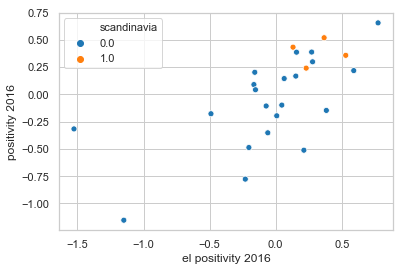

In [751]:
sns.scatterplot(y = final_compare['positivity 2016'], x = final_compare['el positivity 2016'], hue = final_compare['scandinavia'])

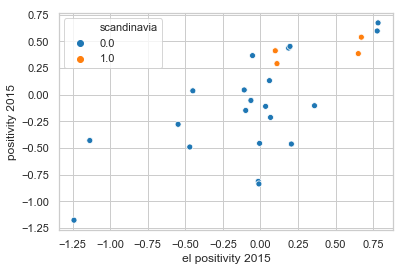

In [752]:
sns.scatterplot(y = final_compare['positivity 2015'], x = final_compare['el positivity 2015'], hue= final_compare['scandinavia'])